In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

In [3]:
df = pd.read_pickle(r"C:\Users\Almog\Desktop\Data Science\Projects\Bank Customer Churn\Pickle files\DataPrep_BCC.pkl")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,True,True,101348.88,True,True,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False,True,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,True,False,113931.57,True,True,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,False,False,93826.63,False,False,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False,False,5,GOLD,425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  string 
 2   Gender              10000 non-null  string 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  bool   
 8   IsActiveMember      10000 non-null  bool   
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  bool   
 11  Complain            10000 non-null  bool   
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  string 
 14  Point Earned        10000 non-null  int64  
dtypes: bool(4), float64(2), int64(6), string(3)
memory usa

#### Data Protocol

In [9]:
warnings.simplefilter(action='ignore', category=FutureWarning) 

# Type of values
df.dtypes.to_excel(r"C:\Users\Almog\Desktop\Data Science\Projects\Bank Customer Churn\Data Protocol\BCC_datatype.xlsx", sheet_name='data_type')

# Maximum values
df.max().to_excel(r"C:\Users\Almog\Desktop\Data Science\Projects\Bank Customer Churn\Data Protocol\max_BCC.xlsx", sheet_name='max')

# Minimum values
df.min().to_excel(r"C:\Users\Almog\Desktop\Data Science\Projects\Bank Customer Churn\Data Protocol\min_BCC.xlsx", sheet_name='min')

# Missing values
df.isnull().sum(axis=0).to_excel(r"C:\Users\Almog\Desktop\Data Science\Projects\Bank Customer Churn\Data Protocol\NA_BCC.xlsx", sheet_name='NA')

# Unique values
df.nunique().to_excel(r"C:\Users\Almog\Desktop\Data Science\Projects\Bank Customer Churn\Data Protocol\unique_BCC.xlsx", sheet_name='unique')


#### Data Visualization:

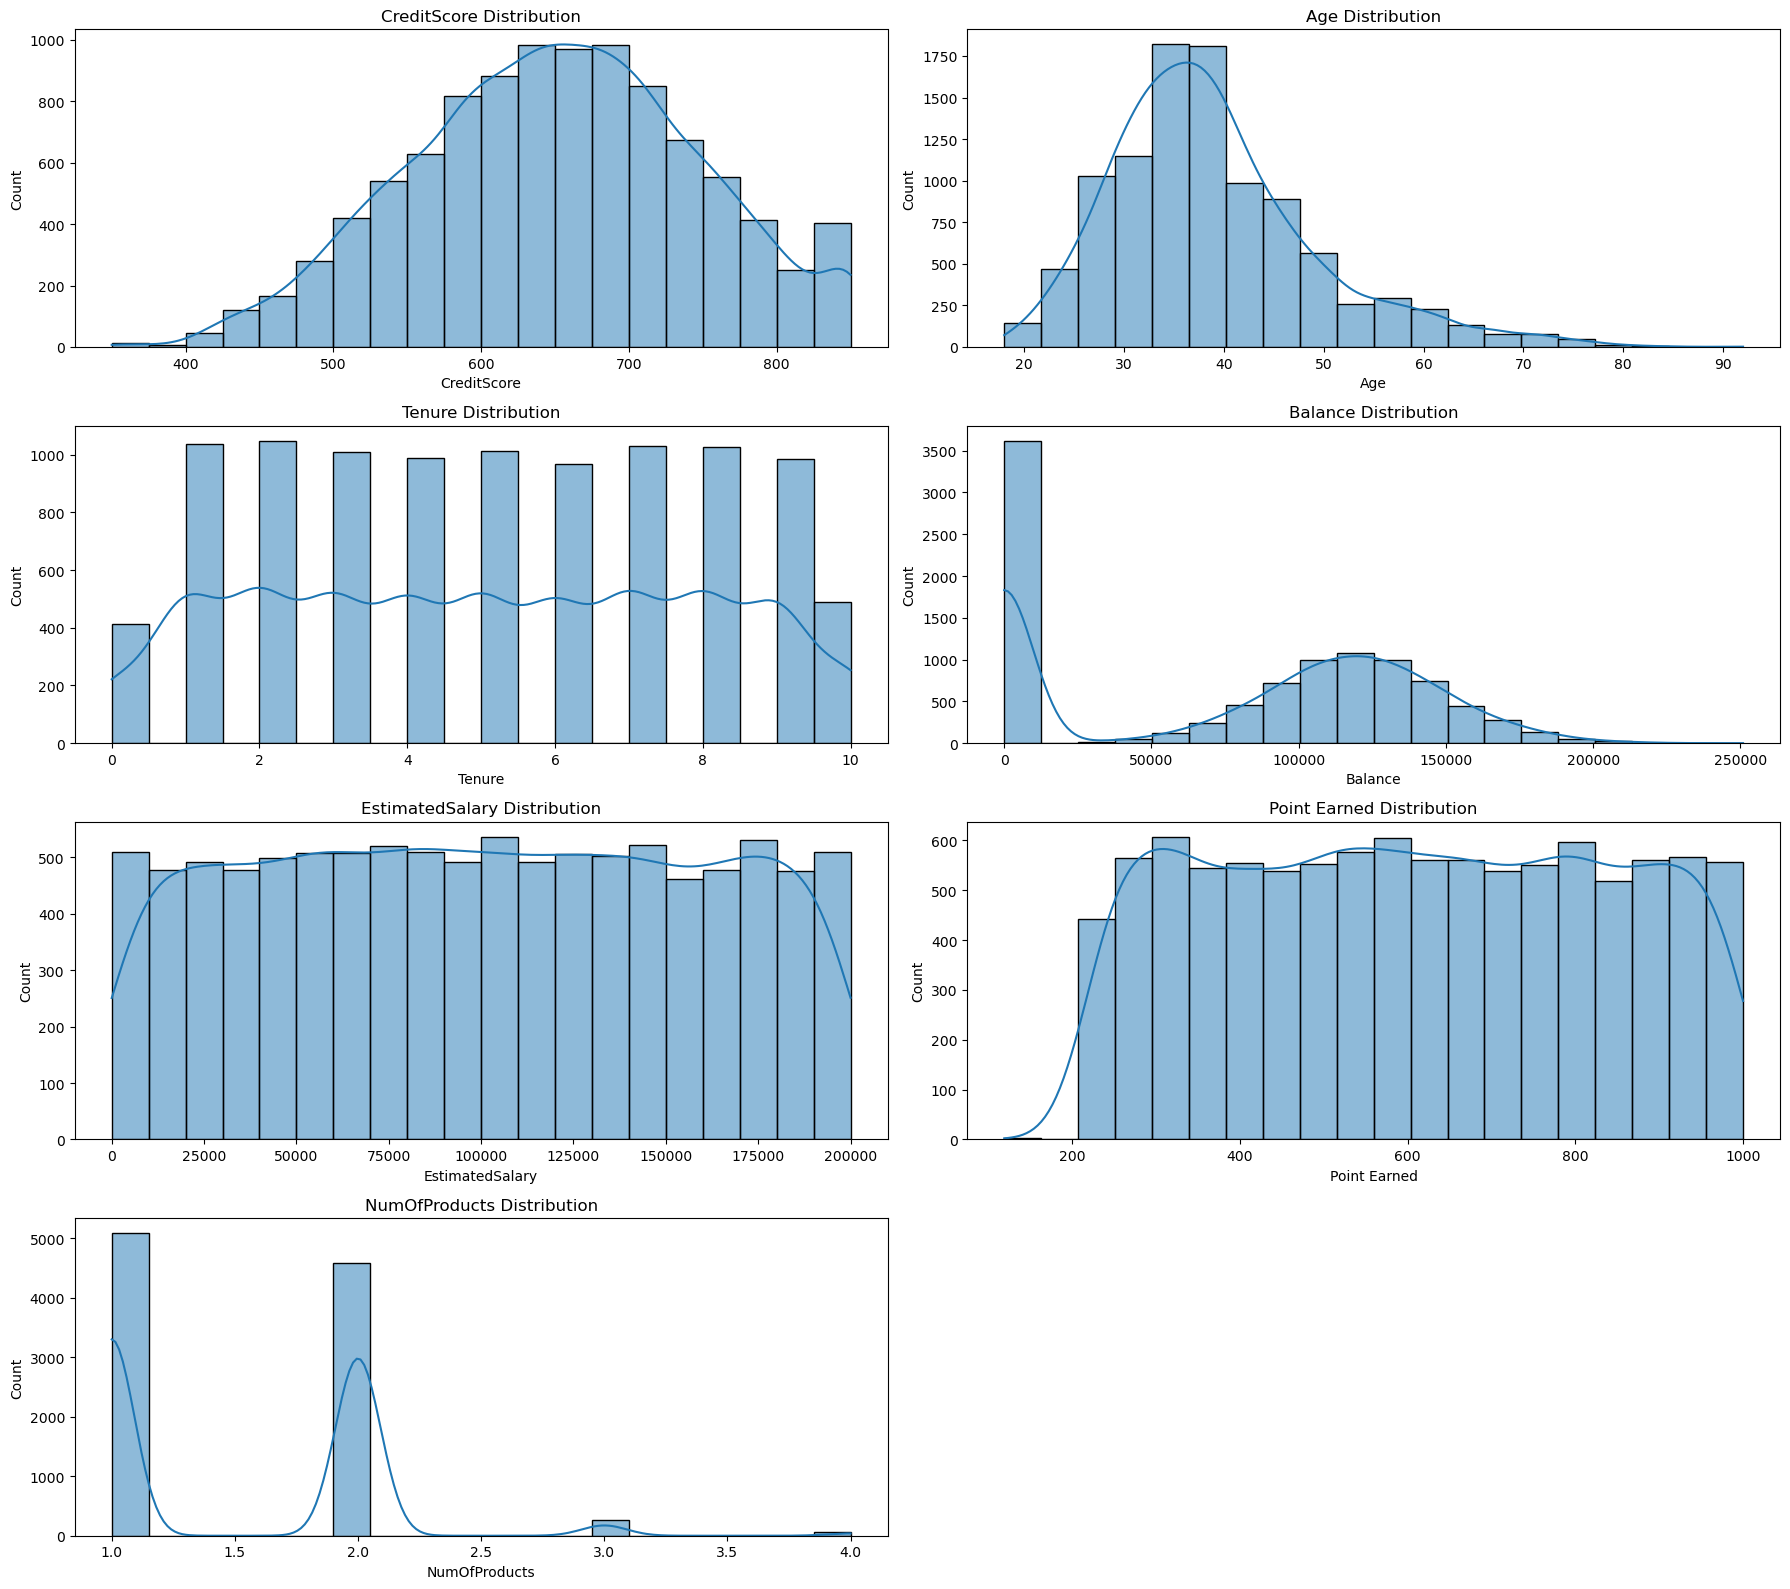

In [49]:
# Numeric columns
num_cols = df[['CreditScore','Age','Tenure','Balance','EstimatedSalary','Point Earned','NumOfProducts']]

n = len(num_cols)
cols = 2
rows = 4

plt.figure(figsize=(cols * 9, rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

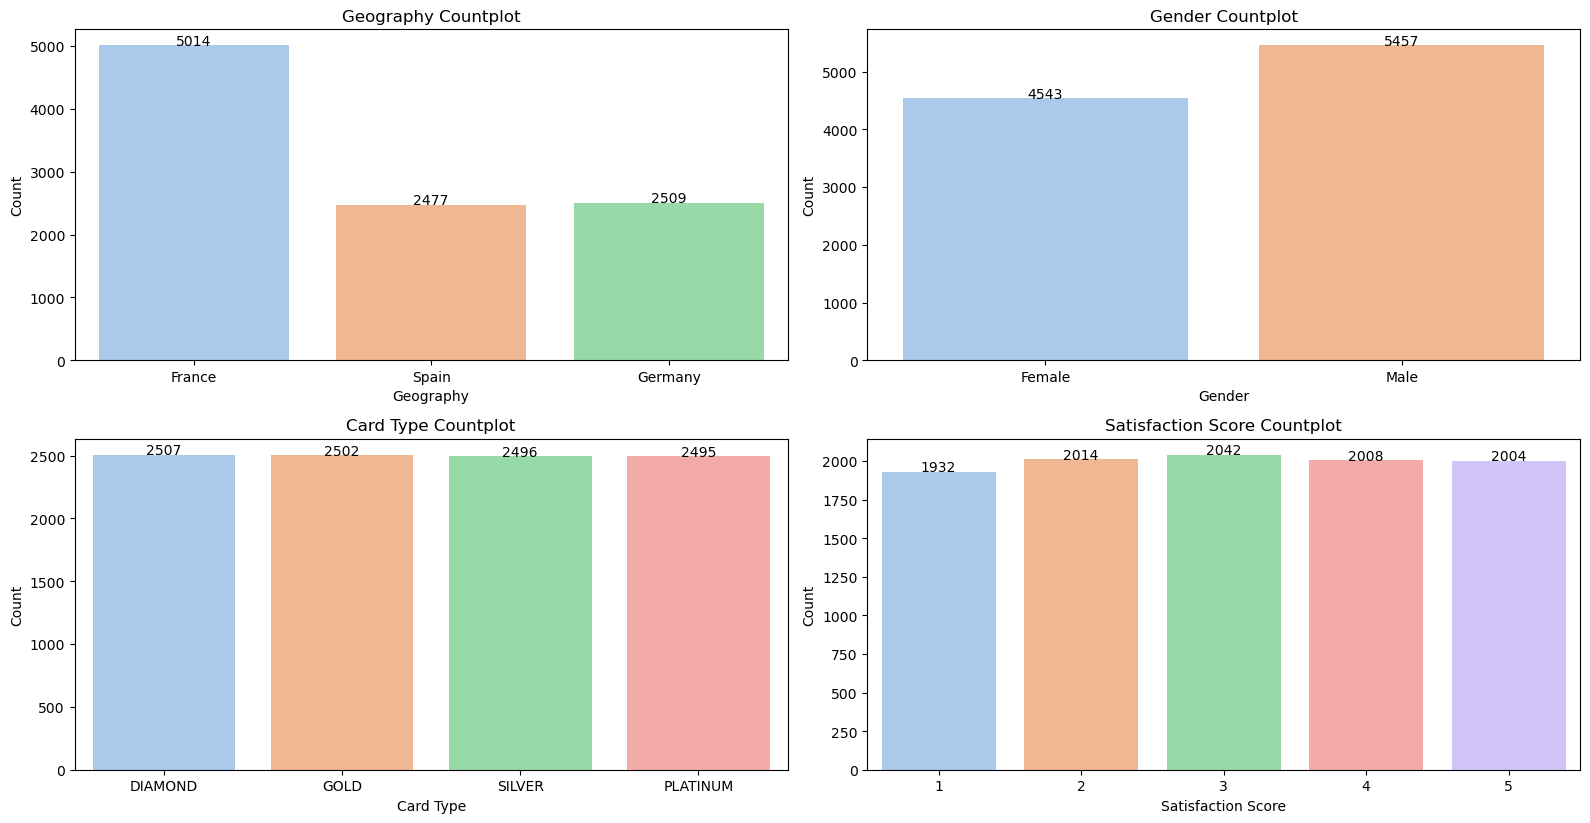

In [50]:
# Categorial columns:
cat_cols = df[['Geography','Gender','Card Type','Satisfaction Score']]

def plot_categorical_countplots(df, cat_cols, cols=2, figsize_per_plot=(8, 4)):
    n = len(cat_cols)
    if n == 0:
        print("No categorical columns to plot.")
        return

    rows = 3
    plt.figure(figsize=(cols * figsize_per_plot[0], rows * figsize_per_plot[1]))

    for i, col in enumerate(cat_cols):
        ax = plt.subplot(rows, cols, i + 1)

        # Handle missing or all-null columns gracefully
        if df[col].dropna().nunique() == 0:
            ax.set_title(f"{col} (Empty)")
            continue

        sns.countplot(data=df, x=col, palette='pastel', ax=ax)

        ax.set_title(f'{col} Countplot')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

        # Add counts on bars
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha='center')

        # Rotate x-labels if too many categories
        if df[col].nunique() > 5:
            labels = ax.get_xticklabels()
            ax.set_xticks(range(len(labels)))
            ax.set_xticklabels(labels, rotation=45, ha='right')


    plt.tight_layout()
    plt.show()

plot_categorical_countplots(df, cat_cols)


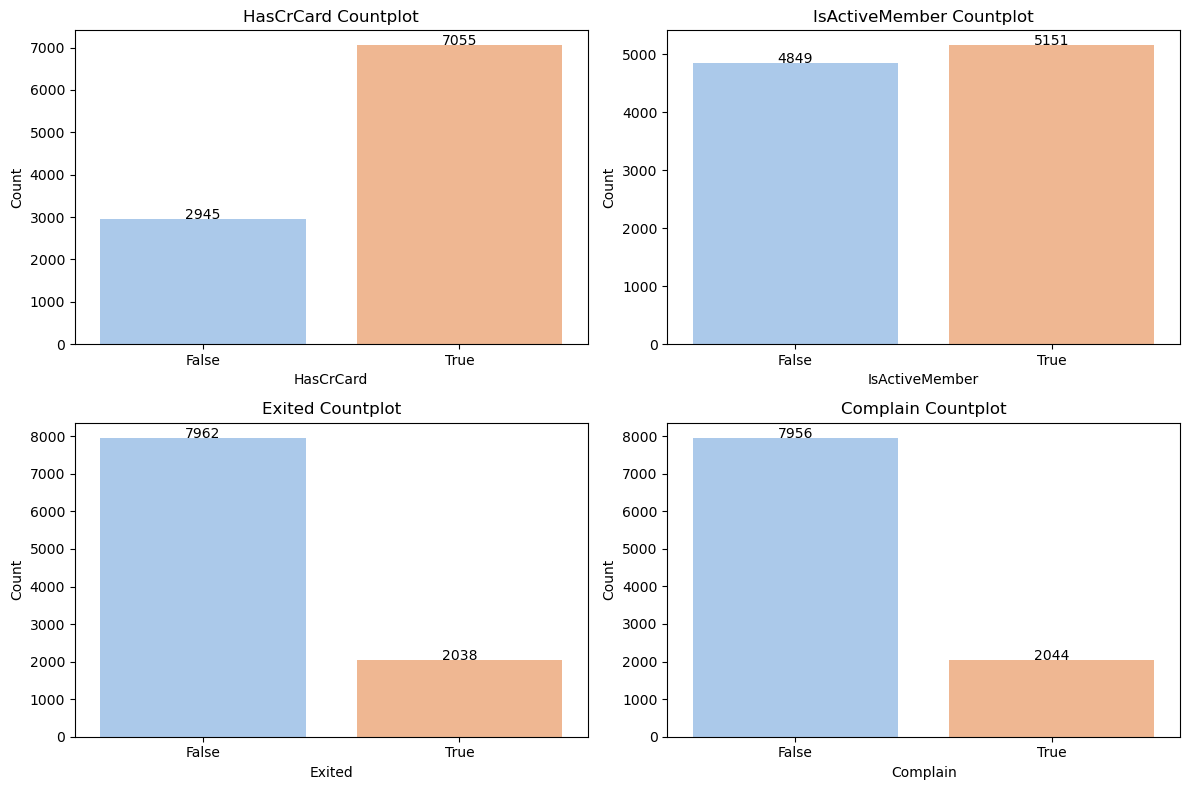

In [23]:
# Categorial-dummy columns:
dum_cols = df[['HasCrCard','IsActiveMember','Exited','Complain']]

def plot_dummy_countplots(df, dum_cols, cols=2, figsize_per_plot=(6, 4)):
    n = len(dum_cols)
    if n == 0:
        print("No dummy columns to plot.")
        return

    rows = 2
    plt.figure(figsize=(cols * figsize_per_plot[0], rows * figsize_per_plot[1]))

    for i, col in enumerate(dum_cols):
        ax = plt.subplot(rows, cols, i + 1)

        # Handle missing or all-null columns gracefully
        if df[col].dropna().nunique() == 0:
            ax.set_title(f"{col} (Empty)")
            continue

        sns.countplot(data=df, x=col, palette='pastel', ax=ax)

        ax.set_title(f'{col} Countplot')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

        # Add counts on bars
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 0.1, int(height), ha='center')

        # For dummy vars, usually just two categories, no rotation needed
        # But if you want, can add rotation if categories > 2

    plt.tight_layout()
    plt.show()
    
plot_dummy_countplots(df, dum_cols)

#### Skewness

In [53]:
from scipy.stats import skew

# Initialize counters
normal_count = 0
non_normal_count = 0

print("Skewness Analysis:\n")

for column in num_cols:
    col_data = df[column].dropna()
    if col_data.empty:
        print(f'{column}: Skewness not applicable (only NaN values)')
        continue

    skewness = skew(col_data)
    if -0.5 <= skewness <= 0.5:
        print(f'{column} - Skewness: {skewness:.2f} => Approximately normal')
        normal_count += 1
    elif -1 <- skewness <= 1:
        print(f'{column} - Skewness: {skewness:.2f} => Moderately skewed')
        non_normal_count += 1
    else:
        print(f'{column} - Skewness: {skewness:.2f} => Highly skewed')
        non_normal_count += 1

print("\nSummary:")
print(f'Total Normal Features: {normal_count}')
print(f'Total Non-Normal Features: {non_normal_count}')

Skewness Analysis:

CreditScore - Skewness: -0.07 => Approximately normal
Age - Skewness: 1.01 => Highly skewed
Tenure - Skewness: 0.01 => Approximately normal
Balance - Skewness: -0.14 => Approximately normal
EstimatedSalary - Skewness: 0.00 => Approximately normal
Point Earned - Skewness: 0.01 => Approximately normal
NumOfProducts - Skewness: 0.75 => Moderately skewed

Summary:
Total Normal Features: 5
Total Non-Normal Features: 2


Business & Modeling Insights

**(`Age`)** is clearly right-skewed — a larger concentration of younger customers with fewer older ones.
- Implication: Age groups may behave differently; consider binning or transforming if it helps model stability. Younger clusters may dominate engagement patterns.

**(`CreditScore`)**, **(`Balance`)**, **(`EstimatedSalary`)**, **(`Tenure`)**, and PointsEarned all show balanced distributions.
- Implication: These features are naturally well-behaved and can likely enter the model without transformations. Their stability makes them strong candidates for correlation analysis and downstream feature importance.

Since most numerical features are roughly normal,
→ **Pearson correlation** is the appropriate default choice.

#### Pearson Correlation

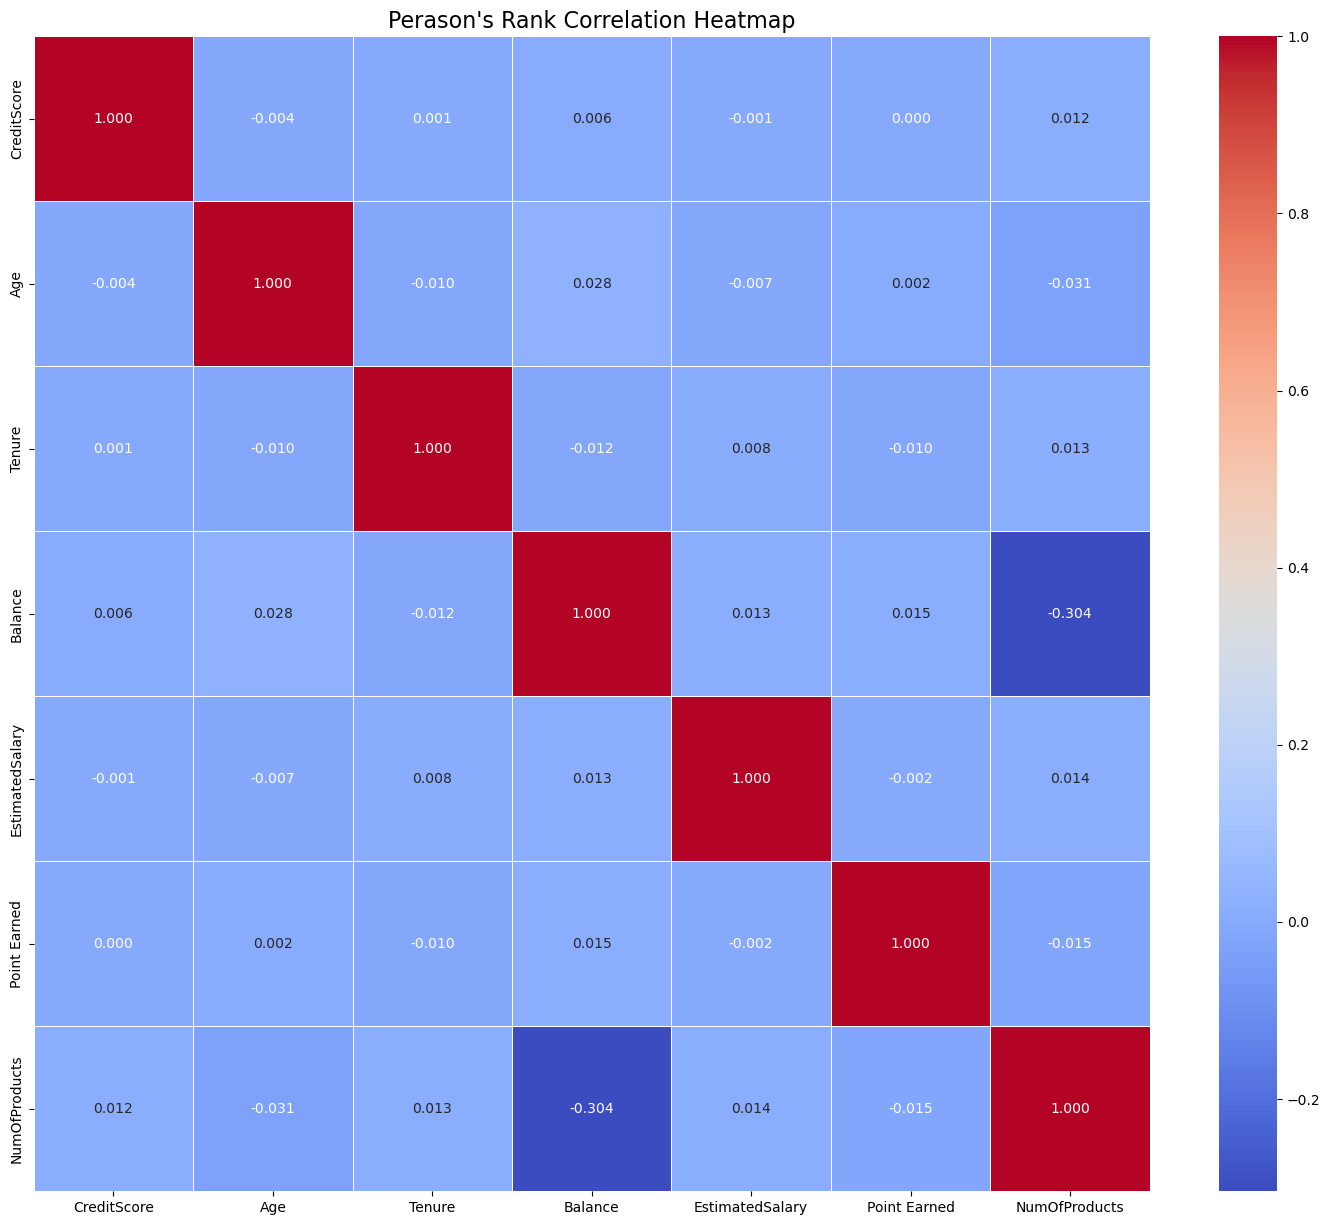


Perason Correlation between numeric features:

CreditScore & Age: -0.004
CreditScore & Tenure: 0.001
CreditScore & Balance: 0.006
CreditScore & EstimatedSalary: -0.001
CreditScore & Point Earned: 0.000
CreditScore & NumOfProducts: 0.012
Age & Tenure: -0.010
Age & Balance: 0.028
Age & EstimatedSalary: -0.007
Age & Point Earned: 0.002
Age & NumOfProducts: -0.031
Tenure & Balance: -0.012
Tenure & EstimatedSalary: 0.008
Tenure & Point Earned: -0.010
Tenure & NumOfProducts: 0.013
Balance & EstimatedSalary: 0.013
Balance & Point Earned: 0.015
Balance & NumOfProducts: -0.304
EstimatedSalary & Point Earned: -0.002
EstimatedSalary & NumOfProducts: 0.014
Point Earned & NumOfProducts: -0.015


In [55]:
pearson_corr = df[['CreditScore','Age','Tenure','Balance','EstimatedSalary','Point Earned','NumOfProducts']].corr(method='pearson')
plt.figure(figsize=(18, 15))

sns.heatmap(pearson_corr, annot=True, fmt=".3f", cmap="coolwarm", cbar=True,
            annot_kws={"size":10}, linewidths=0.5)

plt.title("Perason's Rank Correlation Heatmap", fontsize=16)
plt.show()

# Print correlations as a list
print("\nPerason Correlation between numeric features:\n")
for i in range(len(pearson_corr.columns)):
    for j in range(i+1, len(pearson_corr.columns)):
        feature_1 = pearson_corr.columns[i]
        feature_2 = pearson_corr.columns[j]
        corr_value = pearson_corr.iloc[i, j]
        print(f"{feature_1} & {feature_2}: {corr_value:.3f}")

The numeric features show extremely weak correlations with each other (all values close to 0).

**Key Observations**

Most correlations remain extremely weak — close to zero — except for one notable relationship:

Balance & NumOfProducts: -0.304 → moderate negative correlation

This indicates that customers with higher account balances tend to hold fewer products, and vice versa.

All other pairs stay between -0.03 and +0.03, which is effectively no linear correlation.

**Business Insight**

The Balance–NumOfProducts relationship suggests two distinct customer profiles:

Some customers keep significant funds but prefer minimal product engagement.

Others with lower balances tend to engage with multiple bank products (loans, cards, etc.).

This could be strategic: high-balance customers may not need credit products; low-balance customers may rely on them.

This insight may matter for churn modeling — product engagement and balance might interact in explaining behavior.


In [58]:
from scipy.stats import chi2_contingency
from itertools import combinations

cat_dum_cols = df[['Geography','Gender','Card Type','Satisfaction Score','HasCrCard','IsActiveMember','Exited','Complain']]
def chi_square_test(df, cat_dum_cols):
    for col1, col2 in combinations(cat_dum_cols, 2):
      contingency_table = pd.crosstab(df[col1], df[col2]) 

      chi2, p_value, _, _ = chi2_contingency(contingency_table)

      print(f"Chi-Square Test between {col1} and {col2}:")
      print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p_value:.4f}")
      print("-" * 50)

# Check if df is a DataFrame before running the function
if isinstance(df, pd.DataFrame):
    chi_square_test(df, cat_dum_cols)
elif isinstance(df, pd.core.groupby.DataFrameGroupBy):
    df = df.obj  # Extract the original DataFrame from the GroupBy object
    chi_square_test(df, cat_dum_cols)
else:
    print("Error: df is not a DataFrame or GroupBy object.")

Chi-Square Test between Geography and Gender:
Chi-Square Statistic: 6.92, p-value: 0.0315
--------------------------------------------------
Chi-Square Test between Geography and Card Type:
Chi-Square Statistic: 5.40, p-value: 0.4931
--------------------------------------------------
Chi-Square Test between Geography and Satisfaction Score:
Chi-Square Statistic: 4.81, p-value: 0.7779
--------------------------------------------------
Chi-Square Test between Geography and HasCrCard:
Chi-Square Statistic: 2.24, p-value: 0.3271
--------------------------------------------------
Chi-Square Test between Geography and IsActiveMember:
Chi-Square Statistic: 5.30, p-value: 0.0705
--------------------------------------------------
Chi-Square Test between Geography and Exited:
Chi-Square Statistic: 300.63, p-value: 0.0000
--------------------------------------------------
Chi-Square Test between Geography and Complain:
Chi-Square Statistic: 306.91, p-value: 0.0000
--------------------------------

| Feature Pair                     | p-value | Strength of Evidence          | Key Insight                                                                                          |
| -------------------------------- | ------- | ----------------------------- | ---------------------------------------------------------------------------------------------------- |
| **geography × exited**           | 0.0000  | **Very strong evidence**      | Churn varies sharply by region — geography is a major behavioral driver.                             |
| **geography × complain**         | 0.0000  | **Very strong evidence**      | Complaint rates differ significantly across regions; possible cultural or service-level differences. |
| **gender × exited**              | 0.0000  | **Very strong evidence**      | Strong gender-based pattern in churn behavior.                                                       |
| **gender × complain**            | 0.0000  | **Very strong evidence**      | Complaint patterns differ noticeably between genders.                                                |
| **is_active_member × exited**    | 0.0000  | **Very strong evidence**      | Activity status is tightly linked to churn — key predictor.                                          |
| **is_active_member × complain**  | 0.0000  | **Very strong evidence**      | Complaints strongly tied to membership activity — potential early churn signal.                      |
| **exited × complain**            | 0.0000  | **Extremely strong evidence** | Very high association — customers who complain significantly more likely to churn.                   |
| **geography × gender**           | 0.0315  | **Moderate evidence**         | Gender distribution differs slightly across regions.                                                 |
| **gender × card_type**           | 0.0073  | **Moderate/strong evidence**  | Some gender preference pattern in card type.                                                         |
| **gender × is_active_member**    | 0.0255  | **Moderate evidence**         | Small but meaningful gender difference in activity patterns.                                         |
| **geography × is_active_member** | 0.0705  | Weak/near-significant         | Slight trend — some regions show different activity levels; borderline evidence.                     |
| **Most other categorical pairs** | > 0.10  | No evidence                   | No reliable statistical relationship detected.                                                       |


**Business Insights (Grounded Only in Your Output)**

Churn (Exited) is tightly interconnected with:

Geography

Gender

IsActiveMember

Complain

These features are likely high-value predictors for modeling.

Complaint behavior aligns strongly with both churn and membership activity — potentially indicating:

Customer frustration preceding churn

Or that inactive customers complain more
(your EDA may reveal directionality later)

Card Type barely interacts with anything — low modeling value unless interactions appear later.

Satisfaction Score is surprisingly independent from almost all categorical variables — may not signal behavior until numeric analysis or interactions are inspected.

**Action Items for Modeling**

- Prioritize: Geography, Gender, IsActiveMember, Complain, Exited relationships.

- Keep SatisfactionScore, but don’t expect categorical interactions.

- Consider interaction variables later (e.g., IsActiveMember × Complain).

- No categorical pairs indicate redundancy — keep them all for encoding.

#### Cramér’s V for categorial features:

In [68]:
# Define Cramer's V function:
def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2,p,dof,expected = chi2_contingency(confusion_matrix)
    n =confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape 
    phi2corr = max(0,phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Creating a loop thatruns the function across all combination of categorial relationships in the df:
from itertools import combinations

all_cat_cols = cat_cols + dum_cols

cramers_results = []

# Loop through each unique pair
for col1, col2 in combinations(all_cat_cols, 2):
    value = cramers_v(df[col1], df[col2])
    cramers_results.append((col1, col2, round(value, 3)))

# Convert to DataFrame
cramers_df = pd.DataFrame(cramers_results, columns=["Feature 1", "Feature 2", "Cramér's V"])

# Creating a summary table that groups by the results by thier sternght:
def categorize_cramers_v(value):
    if value >= 0.25:
        return 'Strong'
    elif value >= 0.15:
        return 'Moderate'
    elif value >= 0.10:
        return 'Weak'
    else:
        return 'Very Weak'

# Add strength category
cramers_df["Strength"] = cramers_df["Cramér's V"].apply(categorize_cramers_v)

# Sort for readability
cramers_df = cramers_df.sort_values(by="Cramér's V", ascending=False).reset_index(drop=True)

# Show the top 20 most associated pairs for example
cramers_df.head(20)

,Feature 1,Feature 2,Cramér's V,Strength
0,Complain,Exited,0.995,Strong
1,Complain,Geography,0.175,Moderate
2,Exited,Geography,0.173,Moderate
3,Exited,IsActiveMember,0.156,Moderate
4,Complain,IsActiveMember,0.154,Moderate
5,Exited,Gender,0.106,Weak
6,Complain,Gender,0.106,Weak
7,Card Type,Gender,0.030,Very Weak
8,Gender,Geography,0.022,Very Weak
9,Gender,IsActiveMember,0.020,Very Weak


**Insight:**
These variables have almost no categorical interaction with each other; treat them as independent inputs unless domain knowledge says otherwise.

#### ANOVA test for numerc features vs target:

In [74]:
import scipy.stats as stats

def run_anova_summary(df, target_col, numeric_cols):
    results = []

    for feature in numeric_cols:
        groups = []
        for category in df[target_col].dropna().unique():
            group_values = df[df[target_col] == category][feature].dropna()
            groups.append(group_values)
        
        f_stat, p_val = stats.f_oneway(*groups)
        significance = "Significant" if p_val < 0.05 else "Not Significant"
        
        results.append({
            'Feature': feature,
            'F-Statistic': round(f_stat, 3),
            'p-Value': round(p_val, 4),
            'Significance': significance
        })

    result_df = pd.DataFrame(results)
    return result_df

# Example usage:
summary_table = run_anova_summary(df, 'Exited', num_cols)
print(summary_table)

           Feature  F-Statistic  p-Value     Significance
0      CreditScore        7.171   0.0074      Significant
1              Age      885.884   0.0000      Significant
2           Tenure        1.865   0.1721  Not Significant
3          Balance      142.581   0.0000      Significant
4  EstimatedSalary        1.560   0.2117  Not Significant
5     Point Earned        0.214   0.6435  Not Significant
6    NumOfProducts       22.715   0.0000      Significant


**Overall ANOVA Insight**

4 significant numeric predictors:
Age, Balance, NumOfProducts, CreditScore

3 not significant:
Tenure, EstimatedSalary, Point Earned

This aligns tightly with your correlations and Cramér’s V:

Behavioral intensity (products, balance) = high signal

Demographics (age, credit) = meaningful signal

Reward/tenure/salary = weak or irrelevant

#### Outliers treatment

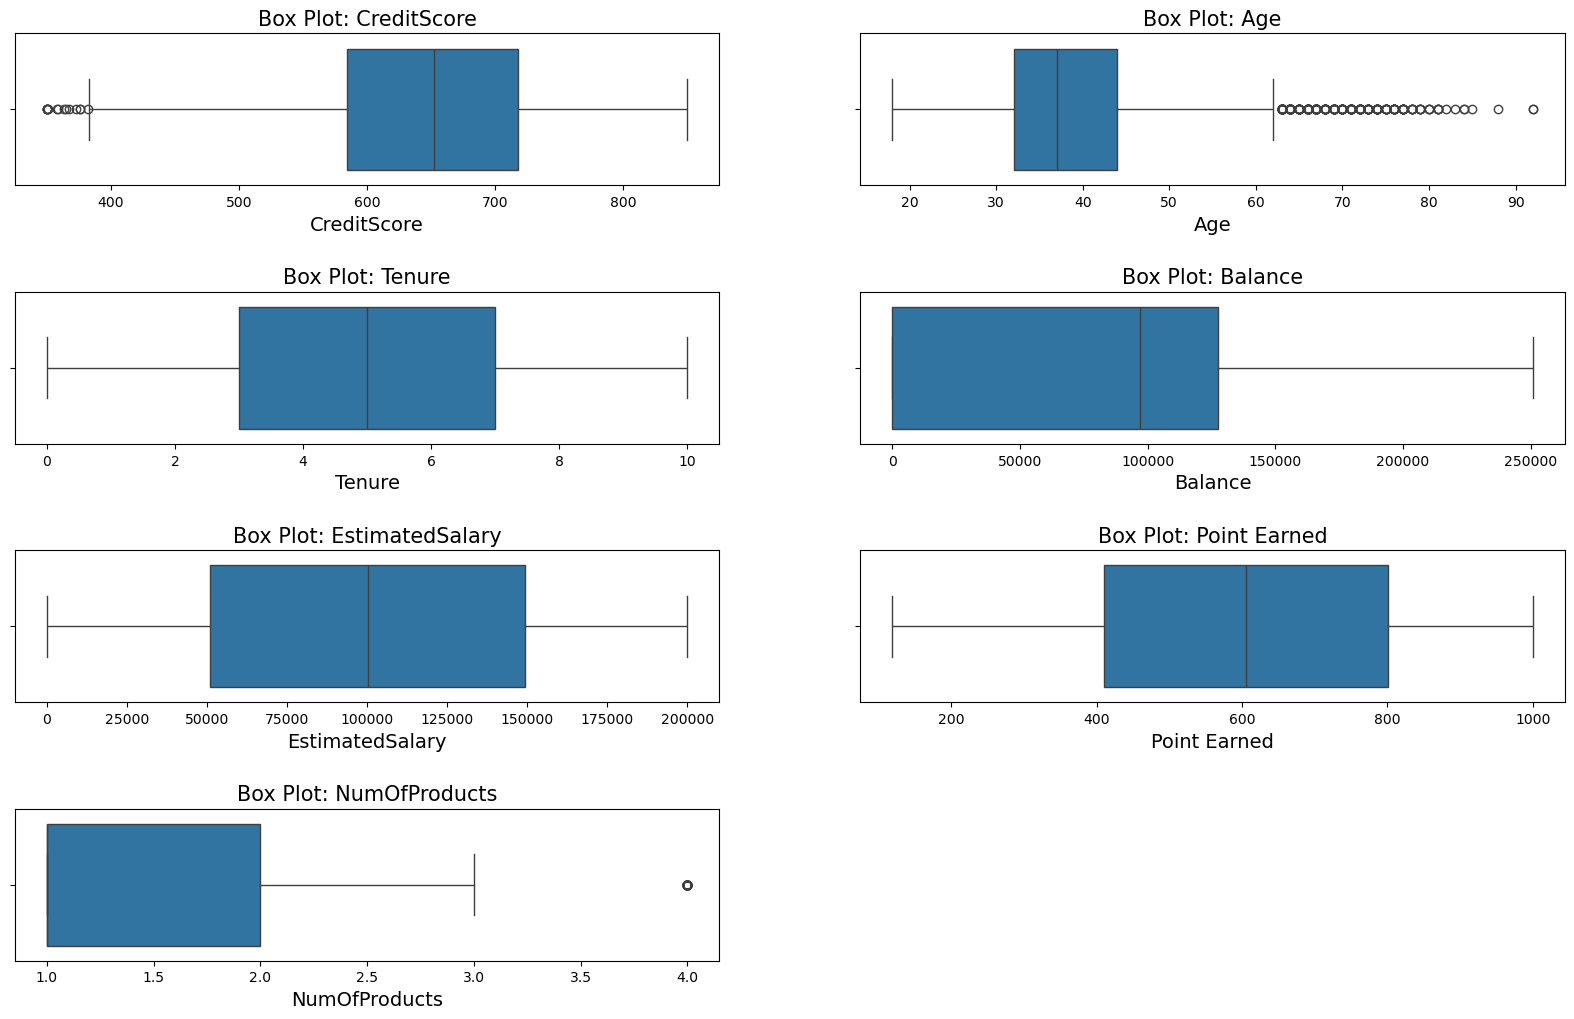

In [91]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(num_cols):
        if col != 'y': 
            ax = plt.subplot(60, 2, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(df)

#### IQR

In [83]:
#Creating a table for outliers change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed


In [95]:
from scipy.stats import ks_2samp, pointbiserialr

target_col = 'Exited'
numeric_cols = df.select_dtypes(include=['number']).columns

out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

# IQR-based outlier detection
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_df = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).astype(int)

for col in numeric_cols:
    out = df[col]
    mask = outliers_df[col] == 0
    non_out = df.loc[mask, col]  # Feature values without outliers
    target_non_out = df.loc[mask, target_col]  # Align target values

    # KS test
    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    # Correlation change (aligned)
    corr_full, _ = pointbiserialr(df[target_col], df[col].fillna(df[col].median()))
    corr_no_out, _ = pointbiserialr(target_non_out, non_out.fillna(non_out.median()))
    corr_changed = '+' if abs(corr_full - corr_no_out) > 0.05 else '-'

    # Store results
    new_row = pd.DataFrame({
        'feature': [col],
        'outliers_cnt': [outliers_df[col].sum()],
        'distribution_changed': [dist_change],
        'correlation_changed': [corr_changed]
    })

    out_df = pd.concat([out_df, new_row], ignore_index=True)

out_df

,feature,outliers_cnt,distribution_changed,correlation_changed
0,CreditScore,15,-,-
1,Age,359,+,+
2,Tenure,0,-,-
3,Balance,0,-,-
4,NumOfProducts,60,-,+
5,EstimatedSalary,0,-,-
6,Satisfaction Score,0,-,-
7,Point Earned,0,-,-


In [97]:
# Add the 'drop' column based on specified conditions
out_df['drop'] = np.where(
    (out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '-'),
    'yes', 'no'
)

# List of features recommended to drop outliers
to_drop = out_df[out_df['drop'] == 'yes']['feature']

# Display the resulting DataFrame with the drop decision
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,CreditScore,15,-,-,no
1,Age,359,+,+,no
2,Tenure,0,-,-,no
3,Balance,0,-,-,no
4,NumOfProducts,60,-,+,no
5,EstimatedSalary,0,-,-,no
6,Satisfaction Score,0,-,-,no
7,Point Earned,0,-,-,no


Outlier analysis using the IQR method showed that, although a few features contained statistical outliers (notably Age, CreditScore, and NumOfProducts), none of them introduced harmful distortion to the data. Changes in distribution or correlation were either minimal or reflected genuine customer behavior rather than noise. As a result, no features required outlier removal, ensuring the dataset remains representative of real-world variability and preserving important customer segments for modeling.

#### Data Imputation

In [102]:
# Check if there are missing values
if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")
else:
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
    plt.title("Missing Values Heatmap")
    plt.show()

No missing values found in the dataset.


In [105]:
df.to_pickle(r"C:\Users\Almog\Desktop\Data Science\Projects\Bank Customer Churn\Pickle files\EDA_BCC.pkl")